# Linear Regression
$$
 y = w1x + w2 
$$
w1 : slope

w2 : y intercept ( where the line intersects with y-axis)
<!-- ![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png) -->


In [1]:
%%HTML
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png", style="height:200px">

In [2]:
from matplotlib import pyplot as plt

# Moving a line
## In linear Regression FITTING A LINE to make it BEST is important.
###  So How we move line by changing the parameters (w1 and w2)?

In [3]:
def line(slope,intercept):
    x = [1,3,5]
    y = []
    for i in x:
        yy = slope*i + intercept
        y.append(yy)
    plt.plot(x,y)

#### Increasing the slope will rotate the line in _ANTICLOCK_ direction 

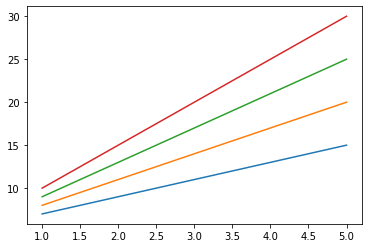

In [4]:
line(2,5) #blue line
line(3,5) #orange 
line(4,5) # green
line(5,5) #red

#### Decreasing the slope will rotate the line in _CLOCK_ direction 

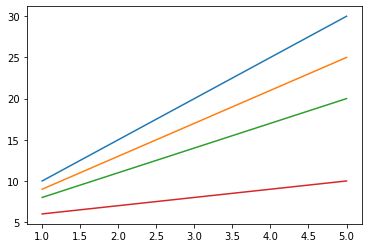

In [5]:
line(5,5) #blue
line(4,5) #orange 
line(3,5) #green
line(1,5) #red

#### Increasing the y intercept(w2) will move the line upward direction in  parallel way 

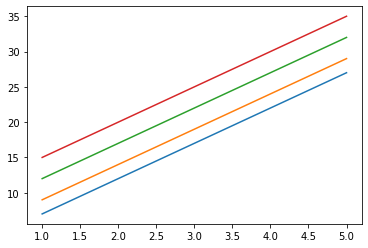

In [6]:
line(5,2) #blue
line(5,4) #orange
line(5,7) #green
line(5,10) #red

#### Decreasing the y intercept(w2) will move the line downward in  parallel way 

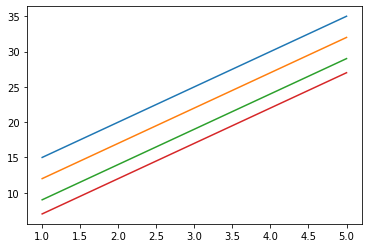

In [7]:
line(5,10) #blue
line(5,7) #orange
line(5,4) #green
line(5,2) #red

## Trick(absolute trick) that will align a line closer to points to make it best
#### add 1 to the y intercept so line move up vertically
#### add p to the slope so line rotate in anticlock direction
our equation becomes 
$$
y = (w1+p)x + (w2+1)
$$
`p : x coordinate`

In [8]:
%%HTML
<img src="trick1.PNG">

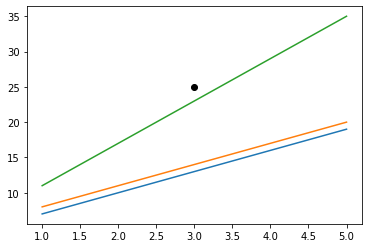

In [9]:
line(3,4) #blue line
p = 3
plt.plot([p], [25], 'o', color='black');
line(3,(4+1)) #adding 1 in y-interscept moves the line vertically upward parallely (RED LINE)
line((3+p),(4+1)) #adding p to slope will rotate the line in anticlock direction (GREEN LINE)

### That's great , now line is close to the point but..........
### we moved the line too much in just 1 step which is not good , so we should take tiny steps.
we can do it by defining a __LEARNING RATE__ (alpha)

Instead of adding 1 to y-intercept and p to slope we will add both alpha times 
$$
y = (w1+p*alpha)x + (w2+1*alpha)
$$

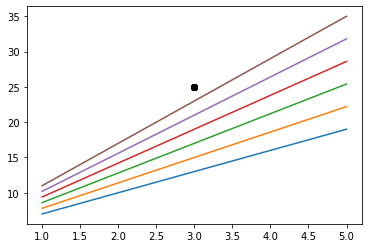

In [10]:
line(3,4) # blue line
def line1(slope,intercept,p,q,alpha):
    plt.plot([p],[q],'o', color='black')
    x = [1,3,5]
    y = []
    for i in x:
        yy = ((slope+(p*alpha))*i) + (intercept+(1*alpha))
        y.append(yy)
    plt.plot(x,y)
line1(3,4,3,25,0.2) # (orange) using new equation
line1(3,4,3,25,0.4) #green
line1(3,4,3,25,0.6) #red
line1(3,4,3,25,0.8) #purple
line1(3,4,3,25,1)

##### What if the point is beneath the line then line should move down parallely and rotate in clock direction which can be achieved by subtracting p times alpha from slope and 1 times alpha from y intercept 
$$
y = (w1 - p*alpha)x + (w2 - 1*alpha)
$$

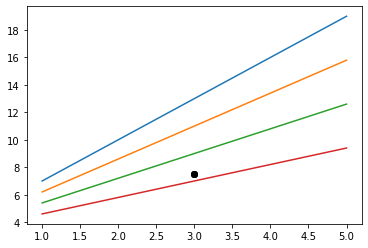

In [11]:

line(3,4) #blue
def line2(slope,intercept,p,q,alpha):
    plt.plot([p],[q],'o', color='black')
    x = [1,3,5]
    y = []
    for i in x:
        yy = ((slope-(p*alpha))*i) + (intercept-(1*alpha)) #-p to slope so its rotates in clock direction and goes down parallely
        y.append(yy)
    plt.plot(x,y)
line2(3,4,3,7.5,0.2) #orange
line2(3,4,3,7.5,0.4) #green
line2(3,4,3,7.5,0.6) #red

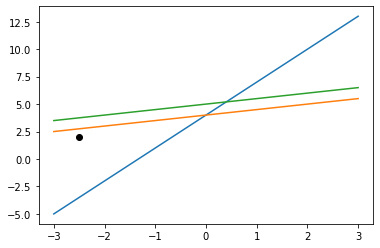

In [12]:
#if the point is on negative x axis
plt.plot([-2.5],[2],'o', color='black')
def line3(slope,intercept):
    x = [-3,-2,-1,1,2,3]
    y = []
    for i in x:
        yy = slope*i + intercept
        y.append(yy)
    plt.plot(x,y)
line3(3,4) #blue
line3((3-2.5),4) #red 
line3((3-2.5),(4+1)) #green


# Square Trick
## what if a point is close or far from line ?
if distance between line and point is small as shown in fig. then we want to move the line very little and if it is large the we want to move the line more

``` Absolute trick has not this property```

In [13]:
%%HTML
<img src="trick2.PNG">

In [14]:
%%HTML
<p>Lets add vertical distance b/w the point and line</p>
<img src="trick2a.PNG">

now our equation becomes 
$$
y = (w1 + p*(q-q`)*alpha)x + (w2 + 1*(q-q`)*alpha)
$$

this will again moves the line upward and rotate it but now if point is far or close to the line , the amount of line moves will be affected

####  what if the point is beneath the line  then line should move down parallely and rotate in clock direction which can be achieved by subtracting p * (q-q') times alpha from slope and (q-q') times alpha from y_intercept.
### So...
#### Should we change our formula as we did in absolute trick?
## NO... because
`if the point is beneath the line then the value of (q-q') would be negative which will automatically update our formula`

our final equation which we can use in linear regression :
$$
y = (w1 + p*(q-q`)*alpha)x + (w2 + 1*(q-q`)*alpha)
$$

we can also say that q-q' is the error between the line and the point if it is minimum ,means that line is closed to the point
$$
y = (w1 + p*error*alpha)x + (w2 + 1*error*alpha)
$$